<a href="https://colab.research.google.com/github/AllyHyeseongKim/CAU13601_Algorithms/blob/feature%2Fassignment04/assignment04/Tensorflow_mnist_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment04: Open Source SW Project (Deep Learning) - Tensorflow MNIST example

## Import libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

## Get MNIST dataset

`MNIST` data located in `tensorflow > keras > datasets > mnist`. \\
`Split data` to (`train images`, `train labels`) and (`test images`, `test labels`)

In [0]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

There are total `60000` `train images` and `train labels`. (60000 images for single class) \\
Shape of single image is `28x28` (pixel).

In [5]:
print('Shape of Train Images: ', train_images.shape)
print('Shape of Train Labels: ', train_labels.shape)
print()
print('Shape of Test Images: ', test_images.shape)
print('Shape of Test Label: ', test_labels.shape)

Shape of Train Images:  (60000, 28, 28)
Shape of Train Labels:  (60000,)

Shape of Test Images:  (10000, 28, 28)
Shape of Test Label:  (10000,)


In [6]:
print('Train Labels: ', train_labels)

Train Labels:  [5 0 4 ... 5 6 8]


## Plot the first train image

When the `value of the image data` is close to `0`: `dark`. \\
When the `value of the image data` is close to `255`: `white`. \\
Print the example of the data of the `first train image data`.

In [7]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

Plot the `first 10 train images` and `corresponding labels`.

First 10 Train Images in MNIST Datasets



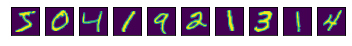


Train labels match with train label sequentialy.
[5 0 4 1 9 2 1 3 1 4]


In [10]:
print('First 10 Train Images in MNIST Datasets')
print()

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()

print()
print('Train labels match with train label sequentialy.')
print(train_labels[:10])

## **[Important] Change the shape of the data**

Change the `shape` of the data (`60000 x 28 x 28)` to `(60000 x 28 x 28 x 1)`

In [0]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1,28, 28, 1])

## Select the convolution model

There are 3 example models.


1.   [`MODEL 1`] `3 Layers` with `1 Convolution Layer`
2.   [`MODEL 2`] `5 Layers` with `2 Convolution Layer`
3.   [`MODEL 3`] `7 Layers` with `4 Convolution Layer`



In [0]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                                         # Layer 1
                                         keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                                         # Layer 2
                                         keras.layers.MaxPool2D((2, 2)),
                                         keras.layers.Flatten(),
                                         # Layer 3
                                         keras.layers.Dense(10, activation = 'softmax')
        ])
    if model_number == 2:
        model = keras.models.Sequential([
                                         # Layer 1
                                         keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                                         # Layer 2
                                         keras.layers.MaxPool2D((2, 2)),
                                         # Layer 3
                                         keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                         # Layer 4
                                         keras.layers.MaxPool2D((2, 2)),
                                         # Layer 5
                                         keras.layers.Flatten(),
                                         keras.layers.Dense(10, activation = 'softmax')
        ])
    if model_number == 3:
        model = keras.models.Sequential([
                                         # Layer 1
                                         keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                                         # Layer 2
                                         keras.layers.MaxPool2D((2, 2)),
                                         # Layer 3
                                         keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                         # Layer 4
                                         keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                         # Layer 5
                                         keras.layers.MaxPool2D((2, 2)),
                                         # Layer 6
                                         keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                         # Layer 7
                                         keras.layers.Flatten(),
                                         keras.layers.Dense(10, activation = 'softmax')
        ])
    
    return model

In [0]:
model = select_model(3)

If you want to see the `information of the model`, `model.summary()` will help. \\
`summary()` is also a `builtin function`.

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

## Components in the training step

`Optimizer`, `loss function`, `accuracy metrics`.

In [0]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Train Step

`Train` for `5 epochs` with the `train data`.

In [21]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2092 - accuracy: 0.9529
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0558 - accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0458 - accuracy: 0.9859
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0378 - accuracy: 0.9883
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0343 - accuracy: 0.9892


## Test Step

`Test` the `convolution model` with the `test data`.

In [23]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print()
print('Test Loss: ', test_loss)
print('Test Accuracy: ', accuracy)

313/313 - 1s - loss: 0.0414 - accuracy: 0.9878

Test Loss:  0.04142288118600845
Test Accuracy:  0.9878000020980835


Before `prediction`, change the `type` of the `test image data` to `float 32`.

In [0]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
print('Shape of Prediction: ', pred.shape)
print('Shape of Test Labels: ', test_labels.shape)

Shape of Prediction:  (10000, 10)
Shape of Test Labels:  (10000,)


## Generate the function for ploting images and probabilities

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                         100 * np.argmax(predictions_array),
                                         Number[true_label]),
                                         color=color)

In [0]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

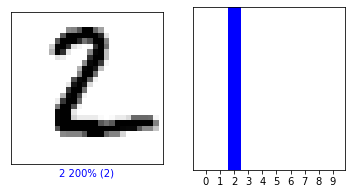

In [35]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred, test_labels)
plt.show()

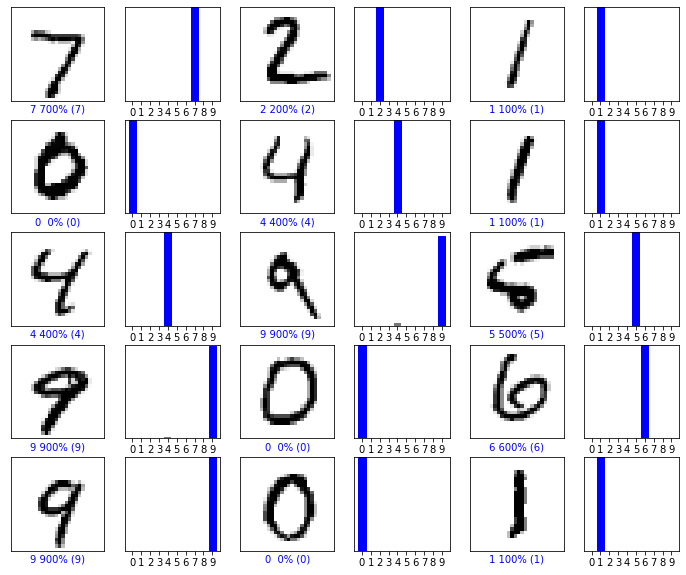

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, pred, test_labels)
plt.show()

## Generate the function for ploting images and probabilities that model predicted wrong

In [0]:
def error_mnist(prediction_array, true_label):
    error_index = []

    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

In [0]:
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Generate the function for ploting images and probabilities that model predicted correct

In [0]:
def correct_mnist(prediction_array, true_label):
    correct_index = []

    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) == true_label[i]:
            correct_index.append(i)
    return correct_index

In [0]:
def plot_correct(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Find the index of the wrong predictions and the correct predictions

Plot the `first 10 wrong predicted images and probabilities`.

In [42]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[18, 321, 435, 445, 447, 450, 543, 582, 625, 646]


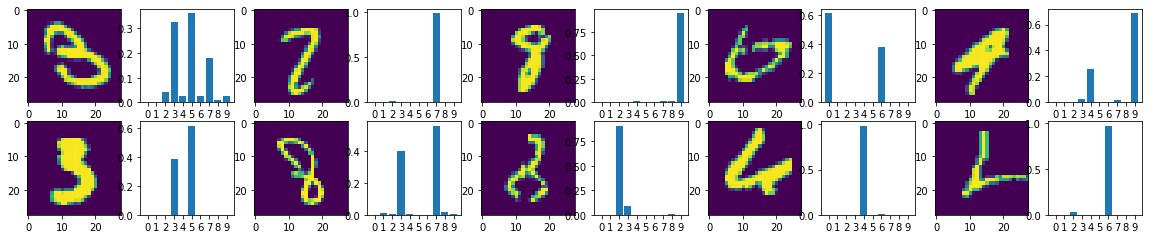

In [43]:
plot_error(index_slice, pred, test_labels)

## Find the index of the correct predictions and the correct predictions

Plot the `first 10 correct predicted images and probabilities`.

In [44]:
index = correct_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


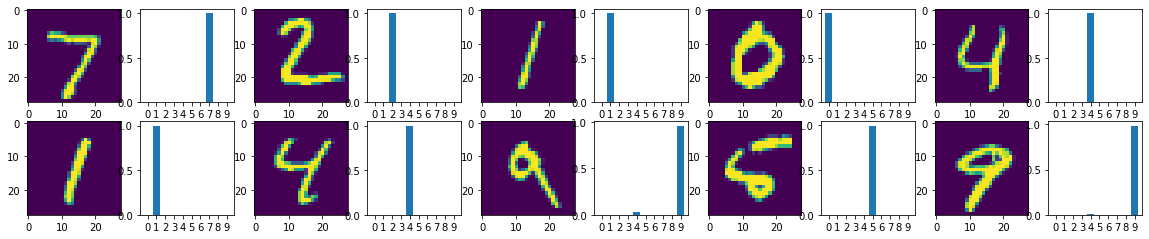

In [45]:
plot_correct(index_slice, pred, test_labels)